In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import files

In [3]:
print("Please upload your CSV file (e.g., 'Mall_Customers.csv')")
uploaded = files.upload()

Please upload your CSV file (e.g., 'Mall_Customers.csv')


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import io
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [5]:
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [9]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

In [10]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Inertia')

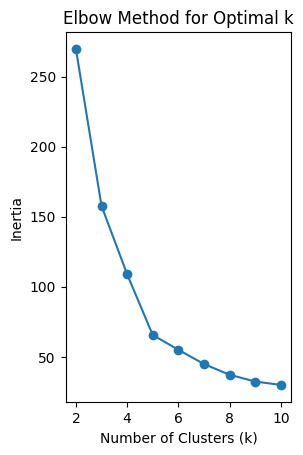

In [11]:
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

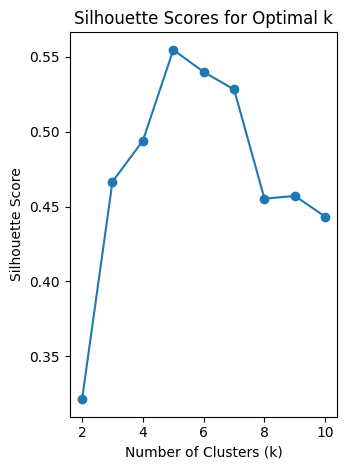

In [12]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [13]:
# Choose optimal k (e.g., k=5 based on elbow/silhouette; adjust as needed)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

In [14]:
df['Cluster'] = cluster_labels

In [15]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Customer Segments: Income vs. Spending Score')

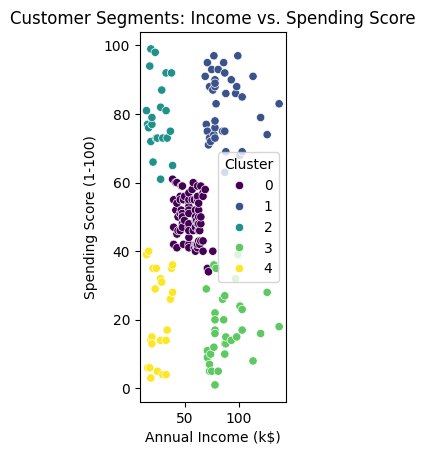

In [16]:
# Plot 1: Annual Income vs. Spending Score (colored by cluster)
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments: Income vs. Spending Score')

Text(0.5, 1.0, 'Customer Segments: Age vs. Income')

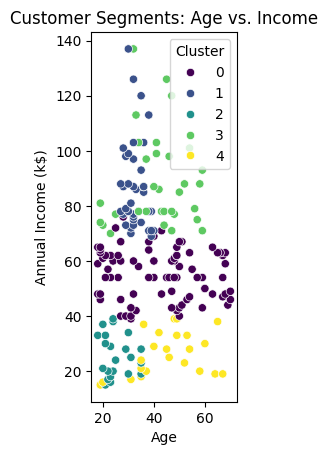

In [17]:
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='viridis')
plt.title('Customer Segments: Age vs. Income')

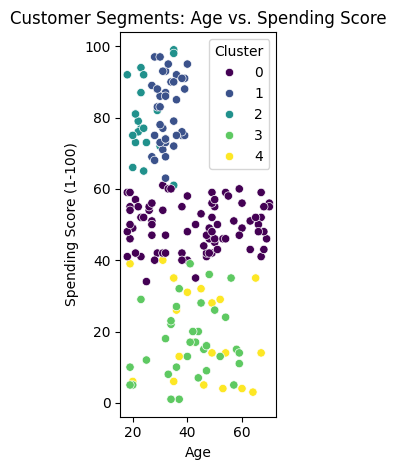

In [18]:
# Plot 3: Age vs. Spending Score (colored by cluster)
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segments: Age vs. Spending Score')

plt.tight_layout()
plt.show()

In [19]:
# Step 5: Print cluster summary
print("\nCluster Summary:")
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
